<h2 style='color:blue' align='center'>Implementation of stochastic and batch grandient descent in python</h2>

Implementing Batch and Stochastic Gradient Descent in Python
We will use a simple home prices dataset to demonstrate the implementation of both batch and stochastic gradient descent in Python. These two methods differ in how they process training data and update model weights:

Batch Gradient Descent:
- Uses all training samples in each forward pass
- Calculates cumulative error across the entire dataset
- Adjusts weights based on derivatives computed from the total error

Stochastic Gradient Descent:
- Randomly selects one training sample at a time
- Performs a forward pass on the selected sample
- Computes the error for that single sample
- Immediately adjusts weights based on this individual sample's error

The key distinction lies in the scope of data used for weight updates:
- Batch GD utilizes the entire training set for each weight adjustment
- Stochastic GD uses a single, randomly chosen training sample for each update

This difference affects the convergence behavior, computational efficiency, and potential for escaping local minima in the optimization process.

##### Load the dataset in pandas dataframe

In [30]:

df = pd.read_csv("/content/sample_data/Austin_Texas.csv")
df.sample(5)


,area,bedrooms,price
4,850,2,1707
19,550,1,2289
1,1800,4,2962
18,1300,3,1707
6,2000,4,2463


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [31]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.1025641 , 0.25      ],
       [0.64102564, 0.75      ],
       [0.28205128, 0.5       ],
       [0.33333333, 0.5       ],
       [0.15384615, 0.25      ],
       [0.12820513, 0.25      ],
       [0.74358974, 0.75      ],
       [0.69230769, 0.75      ],
       [1.        , 1.        ],
       [0.38461538, 0.5       ],
       [0.35897436, 0.5       ],
       [0.61538462, 0.75      ],
       [0.07692308, 0.25      ],
       [0.15384615, 0.25      ],
       [0.30769231, 0.5       ],
       [0.28205128, 0.5       ],
       [0.25641026, 0.5       ],
       [0.33333333, 0.5       ],
       [0.38461538, 0.5       ],
       [0.        , 0.        ]])

In [32]:
scaled_y

array([[0.95211786],
       [0.88812155],
       [0.24585635],
       [0.84300184],
       [0.31031308],
       [1.        ],
       [0.65837937],
       [0.95718232],
       [0.01933702],
       [0.31031308],
       [0.31031308],
       [0.31031308],
       [0.        ],
       [0.06537753],
       [0.81307551],
       [0.31031308],
       [0.1878453 ],
       [0.31031308],
       [0.31031308],
       [0.57826888]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [35]:
scaled_y.reshape(20,)


array([0.95211786, 0.88812155, 0.24585635, 0.84300184, 0.31031308,
       1.        , 0.65837937, 0.95718232, 0.01933702, 0.31031308,
       0.31031308, 0.31031308, 0.        , 0.06537753, 0.81307551,
       0.31031308, 0.1878453 , 0.31031308, 0.31031308, 0.57826888])

##### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

<img src="hp.jpg"/>

##### Now is the time to implement mini batch gradient descent.

In [36]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.35108631, 0.39646333]), 0.12055377247104777, 0.13981963796364547)

###### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

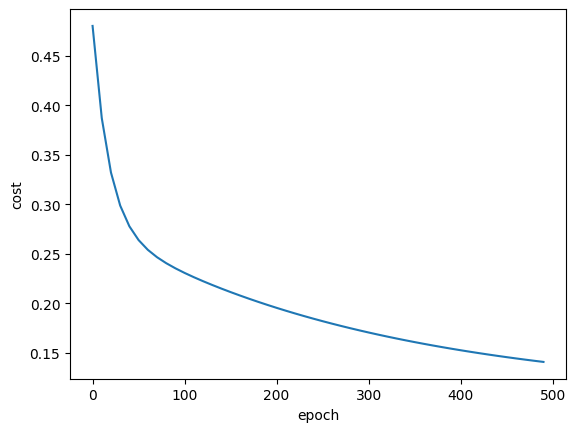

In [37]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

###### Lets do some predictions now.

In [38]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2742.3466281036117

In [39]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1686.0976408251736

In [40]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2096.9052945033973

<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [41]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

6

In [44]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.3477901 , 0.39499959]), 0.12445557142472767, 0.01868100729502459)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [45]:
w , b

(array([0.35108631, 0.39646333]), 0.12055377247104777)

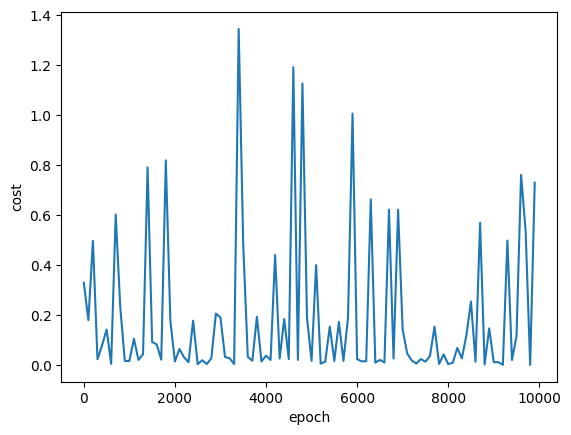

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [47]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2740.9104045719437

In [48]:
predict(1000,2,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1692.1253797549564

In [49]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2100.3024917736966